# Perceptron and MLP in Python

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

## Plot decision boundary

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, s=42)

## Train and test spliting for data #1

In [4]:
from sklearn.model_selection import train_test_split
data1 = pd.read_csv('../workshop-datafiles/data1.csv')
print(data1.head())
feat_cols = ['x1', 'x2']

Dtrain, Dtest = train_test_split(data1, test_size=0.2, random_state=42)

Xtrain = Dtrain[feat_cols].values
Xtest  = Dtest[feat_cols].values

ytrain = Dtrain['label'].values
ytest  = Dtest['label'].values

         x1        x2  label
0  3.222080  2.051604      1
1  0.633193  0.211618      0
2  1.776411  1.628939      1
3  0.210951  0.419750      0
4  0.894606  0.808269      1


## Perceptron Model for data #1

Testing accuracy 0.9


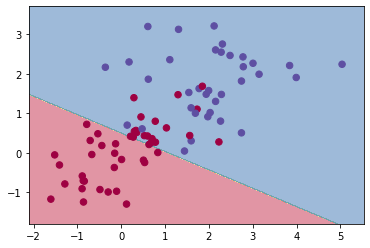

In [13]:
from sklearn.linear_model import Perceptron
from sklearn import metrics

# Create the perceptron object (net)
# set random_state for repeatability of results
p = Perceptron(random_state=42)
p.fit(Xtrain, ytrain)
predicts = p.predict(Xtest)
print("Testing accuracy {}".format(metrics.accuracy_score(ytest, predicts)))
# Visualize the decision boundary
plot_decision_boundary(lambda x: p.predict(x), Xtrain, ytrain)

## Train and test spliting for data #2

In [14]:
data2 = pd.read_csv('../workshop-datafiles/data2.csv')
print(data2.head())
# Split the  data into training and testing
Dtrain2, Dtest2 = train_test_split(data2, test_size=0.2, random_state=42)

Xtrain2 = Dtrain2[feat_cols].values
Xtest2  = Dtest2[feat_cols].values

ytrain2 = Dtrain2['label'].values
ytest2  = Dtest2['label'].values

         x1        x2  label
0 -0.382891 -0.090840      1
1 -0.020962 -0.477874      1
2 -0.396116 -1.289427      0
3 -0.618130 -0.063837      1
4  0.703478 -0.187038      1


## Perceptron Model for data #2

Testing accuracy 0.65


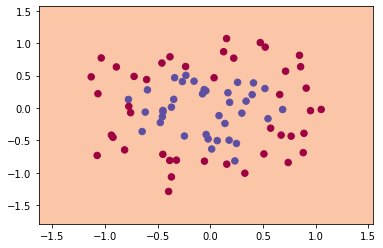

In [15]:
p.fit(Xtrain2, ytrain2)
predicts2 = p.predict(Xtest2)
print("Testing accuracy {}".format(metrics.accuracy_score(ytest2, predicts2)))
# Visualize the decision boundary
plot_decision_boundary(lambda x: p.predict(x), Xtrain2, ytrain2)


# Multilayer Perceptron Classifier

In [16]:
num_examples = len(Xtrain2) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

## Code example #12

In [17]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(X, y, nn_hdim, num_passes=20000):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}
    
    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    
    return model


# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)


## Call build_model

Training accuracy: 0.9
Testing accuracy : 0.75


Text(0.5, 1.0, 'Decision Boundary')

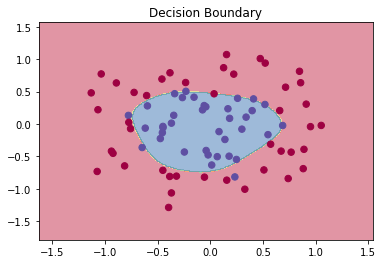

In [18]:

# Build a model with a 3-dimensional hidden layer
model = build_model(Xtrain2, ytrain2, 3)

print("Training accuracy: {}".format(metrics.accuracy_score(ytrain2, predict(model,Xtrain2) )))
print("Testing accuracy : {}".format(metrics.accuracy_score(ytest2, predict(model,Xtest2) )))
# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x), Xtrain2, ytrain2)
plt.title("Decision Boundary")

## Sklearn Multilayer Perceptron Classifier

Training accuracy: 0.975
Testing accuracy : 0.7


Text(0.5, 1.0, 'Decision Boundary')

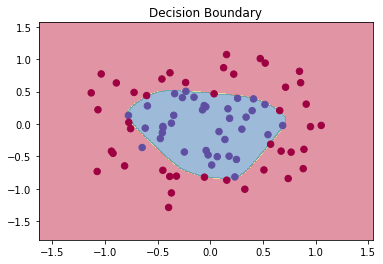

In [19]:
from sklearn.neural_network import MLPClassifier
#clf = MLPClassifier(hidden_layer_sizes=(3,), max_iter=20000, alpha=reg_lambda, activation = 'tanh',
#                    solver='sgd', verbose=0, random_state=0,
#                    learning_rate_init=epsilon)

clf = MLPClassifier(random_state=1, max_iter=20000, hidden_layer_sizes=(3,), activation='tanh', solver='lbfgs')

clf.fit(Xtrain2, ytrain2)
print("Training accuracy: {}".format(metrics.accuracy_score(ytrain2, clf.predict(Xtrain2) )))
print("Testing accuracy : {}".format(metrics.accuracy_score(ytest2, clf.predict(Xtest2) )))
# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x), Xtrain2, ytrain2)
plt.title("Decision Boundary")